# Preprocessing & Sampling

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

## Import Dataset

In [2]:
df = pd.read_csv("Data/travel_insurance.csv")

## Preprocessing Data

### Handling Missing Data

In [3]:
#Check the percentages of missing value
df.isnull().sum() / df.shape[0] * 100

Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Claim                    0.000000
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Gender                  71.229827
Age                      0.000000
dtype: float64

- Gender has 71% NaN Values

Approaches to handle Missing Values:
1. Deleting the columns with missing data
2. Deleting the rows with missing data
3. Filling the missing data with a value – Imputation
4. Imputation with an additional column
5. Filling with a Regression Model

In this case, we can either 
1. Delete column 'Gender'
or
2. Create three categories: M,F,Unknown

In [4]:
# Imputing with 'U' unspecified gender
#df['Gender'] = df['Gender'].fillna('U')
df=df.drop(['Gender'], axis = 1) 

### Introducing "OTHERS"

In [5]:
df1_saved = df.copy() 

#### Destination

In [6]:
temp = df["Destination"].value_counts().rename_axis('unique_values').reset_index(name='counts') 
len(temp.loc[temp['counts']>1000])

15

In [7]:
print("Other Category will contain this percentage of data: ",100 - (temp.loc[temp['counts']>1000].counts.sum() * 100 /temp.counts.sum()))

Other Category will contain this percentage of data:  14.235858888923985


In [8]:
Allowed_Countries = temp.loc[temp['counts']>1000].unique_values.tolist()
df['Destination']=df['Destination'].apply(lambda x: x if x in Allowed_Countries else 'OTHER')

In [9]:
temp.loc[temp['counts']>1000]

,unique_values,counts
0,SINGAPORE,13255
1,MALAYSIA,5930
2,THAILAND,5894
3,CHINA,4796
4,AUSTRALIA,3694
5,INDONESIA,3452
6,UNITED STATES,2530
7,PHILIPPINES,2490
8,HONG KONG,2411
9,INDIA,2251


#### Product Name

In [122]:
temp2 = df["Product Name"].value_counts().rename_axis('unique_values').reset_index(name='counts') 
len(temp2.loc[temp2['counts']>3000])

6

In [123]:
print("Other Category will contain this percentage of data: ",100 - (temp2.loc[temp2['counts']>3000].counts.sum() * 100 /temp.counts.sum()))

Other Category will contain this percentage of data:  15.9634273442188


In [124]:
Allowed_Products = temp2.loc[temp2['counts']>3000].unique_values.tolist()
df['Product Name'] = df['Product Name'].apply(lambda x: x if x in Allowed_Products else 'Other')

#### Agency Type

In [125]:
temp3 = df["Agency"].value_counts().rename_axis('unique_values').reset_index(name='counts') 
len(temp3.loc[temp3['counts']>6400])

3

In [126]:
temp3.loc[temp3['counts']>6400]

,unique_values,counts
0,EPX,35119
1,CWT,8580
2,C2B,8267


In [127]:
print("Other Category will contain this percentage of data: ",100 - (temp3.loc[temp3['counts']>6400].counts.sum() * 100 /temp.counts.sum()))

Other Category will contain this percentage of data:  17.938919243280807


In [128]:
Allowed_Agencies = temp3.loc[temp3['counts']>6400].unique_values.tolist()
df['Agency'] = df['Agency'].apply(lambda x: x if x in Allowed_Agencies else 'OTH')

### Encoding

In [129]:
df1_saved = df.copy()

In [130]:
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Age'],
      dtype='object')

In [131]:
df

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,OTH,Travel Agency,Offline,Other,No,186,MALAYSIA,-29.0,9.57,81
1,OTH,Travel Agency,Offline,Other,No,186,MALAYSIA,-29.0,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,OTHER,-19.8,11.88,41
...,...,...,...,...,...,...,...,...,...,...
63321,OTH,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,31
63322,OTH,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,40
63323,OTH,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,57
63324,OTH,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,63


In [132]:
#Label Encoding
from sklearn import preprocessing

label_encoder2 = preprocessing.LabelEncoder()
df.loc[:,'Agency Type']= label_encoder2.fit_transform(df.loc[:, 'Agency Type'])

label_encoder3 = preprocessing.LabelEncoder()
df.loc[:,'Distribution Channel']= label_encoder3.fit_transform(df.loc[:, 'Distribution Channel'])

label_encoder5 = preprocessing.LabelEncoder()
df.loc[:,'Claim']= label_encoder5.fit_transform(df.loc[:,'Claim'])

<AxesSubplot:>

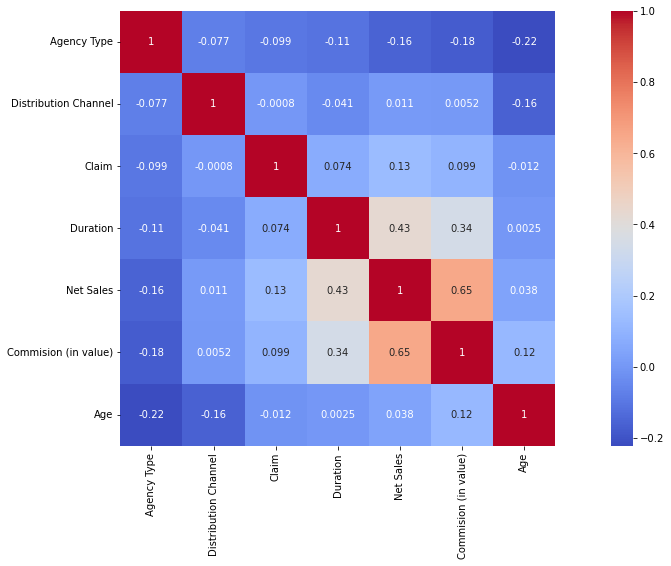

In [133]:
#Correlation Matrix

plt.figure(figsize = (20,8))
sns.heatmap(df.corr(), square=True,annot=True,cmap= 'coolwarm')

In [134]:
#Shifting the target column
first_column = df.pop('Claim')

df.insert(0, 'Claim', first_column)

In [135]:
df

,Claim,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,0,OTH,1,0,Other,186,MALAYSIA,-29.0,9.57,81
1,0,OTH,1,0,Other,186,MALAYSIA,-29.0,9.57,71
2,0,CWT,1,1,Rental Vehicle Excess Insurance,65,AUSTRALIA,-49.5,29.70,32
3,0,CWT,1,1,Rental Vehicle Excess Insurance,60,AUSTRALIA,-39.6,23.76,32
4,0,CWT,1,1,Rental Vehicle Excess Insurance,79,OTHER,-19.8,11.88,41
...,...,...,...,...,...,...,...,...,...,...
63321,0,OTH,0,1,Basic Plan,111,JAPAN,35.0,12.25,31
63322,0,OTH,0,1,Basic Plan,58,CHINA,40.0,14.00,40
63323,0,OTH,0,1,Basic Plan,2,MALAYSIA,18.0,6.30,57
63324,0,OTH,0,1,Basic Plan,3,VIET NAM,18.0,6.30,63


In [136]:
#One Hot Encoding
df = pd.get_dummies(df, columns=['Agency','Product Name','Destination'], drop_first=True)

In [137]:
df.shape

(63326, 31)

In [138]:
df

,Claim,Agency Type,Distribution Channel,Duration,Net Sales,Commision (in value),Age,Agency_CWT,Agency_EPX,Agency_OTH,...,"Destination_KOREA, REPUBLIC OF",Destination_MALAYSIA,Destination_OTHER,Destination_PHILIPPINES,Destination_SINGAPORE,"Destination_TAIWAN, PROVINCE OF CHINA",Destination_THAILAND,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_VIET NAM
0,0,1,0,186,-29.0,9.57,81,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,186,-29.0,9.57,71,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0,1,1,65,-49.5,29.70,32,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,60,-39.6,23.76,32,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,79,-19.8,11.88,41,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63321,0,0,1,111,35.0,12.25,31,0,0,1,...,0,0,0,0,0,0,0,0,0,0
63322,0,0,1,58,40.0,14.00,40,0,0,1,...,0,0,0,0,0,0,0,0,0,0
63323,0,0,1,2,18.0,6.30,57,0,0,1,...,0,1,0,0,0,0,0,0,0,0
63324,0,0,1,3,18.0,6.30,63,0,0,1,...,0,0,0,0,0,0,0,0,0,1


### Splitting the dataset into X,y

In [139]:
X=df.iloc[:,1:]                                              #-1 means index of last column
y=df.iloc[:,0]

## Handling Imbalanced Data

### Undersampling

In [140]:
# check version number
import imblearn
print(imblearn.__version__)

0.9.0


NearMiss-1 selects examples from the majority class that have the smallest average distance to the three closest examples from the minority class. 

NearMiss-2 selects examples from the majority class that have the smallest average distance to the three furthest examples from the minority class. 

NearMiss-3 involves selecting a given number of majority class examples for each example in the minority class that are closest.

#### NearMiss-1

In [141]:
from imblearn.under_sampling import NearMiss

# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)

# transform the dataset
X_u1, y_u1 = undersample.fit_resample(X, y)

In [142]:
X_u1.shape

(1854, 30)

In [143]:
y_u1.shape

(1854,)

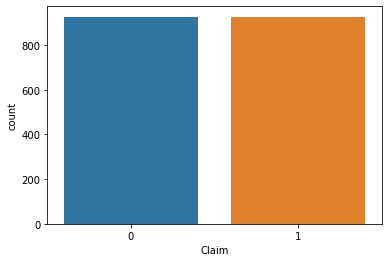

In [144]:
# Countplot for target variable
fig = sns.countplot(x = y_u1)

In [145]:
#y_train_u1 = y_train_u1.values.reshape(-1,1)

In [146]:
y_u1.shape

(1854,)

#### NearMiss-2

In [147]:
X

,Agency Type,Distribution Channel,Duration,Net Sales,Commision (in value),Age,Agency_CWT,Agency_EPX,Agency_OTH,Product Name_2 way Comprehensive Plan,...,"Destination_KOREA, REPUBLIC OF",Destination_MALAYSIA,Destination_OTHER,Destination_PHILIPPINES,Destination_SINGAPORE,"Destination_TAIWAN, PROVINCE OF CHINA",Destination_THAILAND,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_VIET NAM
0,1,0,186,-29.0,9.57,81,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,186,-29.0,9.57,71,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,1,1,65,-49.5,29.70,32,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,60,-39.6,23.76,32,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,79,-19.8,11.88,41,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63321,0,1,111,35.0,12.25,31,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
63322,0,1,58,40.0,14.00,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
63323,0,1,2,18.0,6.30,57,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
63324,0,1,3,18.0,6.30,63,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [148]:
# define the undersampling method
undersample = NearMiss(version=2, n_neighbors=3)

# transform the dataset
X_u2, y_u2 = undersample.fit_resample(X, y)

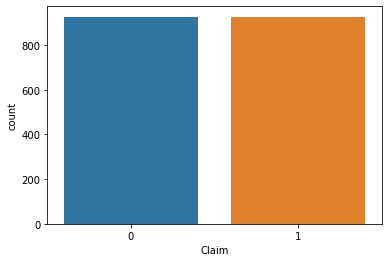

In [149]:
# Countplot for target variable
fig = sns.countplot(x = y_u2)

In [150]:
#y_u2 = y_u2.values.reshape(-1,1)

In [151]:
y_u2

0       0
1       0
2       0
3       0
4       0
       ..
1849    1
1850    1
1851    1
1852    1
1853    1
Name: Claim, Length: 1854, dtype: int32

#### NearMiss-3

In [152]:
# define the undersampling method
undersample = NearMiss(version=3, n_neighbors=3)

# transform the dataset
X_u3, y_u3 = undersample.fit_resample(X, y)

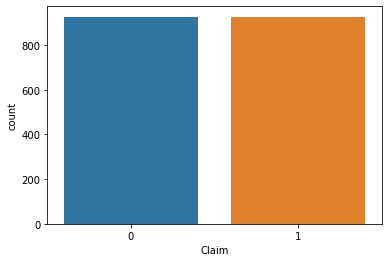

In [153]:
# Countplot for target variable
fig = sns.countplot(x = y_u3)

In [154]:
#y_train_u3 = y_train_u3.values.reshape(-1,1)

#### Random Undersampling

In [155]:
# import library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', y.shape)
print('Resample dataset shape', y_rus.shape)

original dataset shape: (63326,)
Resample dataset shape (1854,)


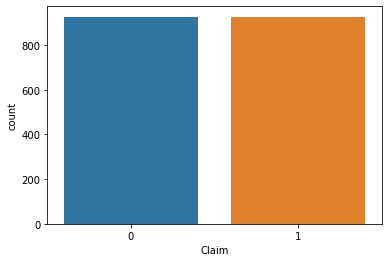

In [156]:
# Countplot for target variable
fig = sns.countplot(x = y_rus)

In [157]:
#y_train_rus = y_train_rus.values.reshape(-1,1)

### Oversampling

#### Random Oversampling

In [158]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variablex_ros, y_ros = ros.fit_resample(x, y)
X_ros, y_ros = ros.fit_resample(X, y)

print('original dataset shape:', y.shape)
print('Resample dataset shape', y_ros.shape)

original dataset shape: (63326,)
Resample dataset shape (124798,)


#### SMOTE

In [159]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X, y)

print('original dataset shape:', y.shape)
print('Resample dataset shape', y_smote.shape)

original dataset shape: (63326,)
Resample dataset shape (124798,)


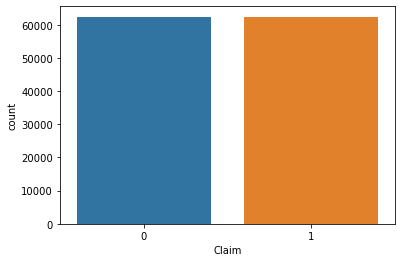

In [160]:
# Countplot for target variable
fig = sns.countplot(x = y_smote)

### SMOTEENN

In [88]:
from imblearn.combine import SMOTEENN

sm = SMOTEENN()

X_resampled, y_resampled = sm.fit_resample(X,y)

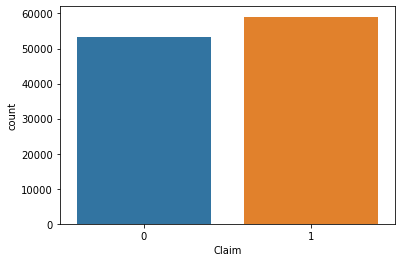

In [161]:
# Countplot for target variable
fig = sns.countplot(x = y_resampled)

## Store

In [162]:
df_og = X.copy()
df_og['Claim'] = y

df_nm1 = X_u1.copy()
df_nm1['Claim'] = y_u1

df_nm2 = X_u2.copy()
df_nm2['Claim'] = y_u2

df_nm3 = X_u3.copy()
df_nm3['Claim'] = y_u3

df_rus = X_rus.copy()
df_rus['Claim'] = y_rus

df_ros = X_ros.copy()
df_ros['Claim'] = y_ros

df_smote = X_smote.copy()
df_smote['Claim'] = y_smote

df_smoteen = X_resampled.copy()
df_smoteen['Claim'] = y_resampled

In [163]:
from pathlib import Path
filepath = Path('Data/data_og.csv')  
df_og.to_csv(index=False, path_or_buf=filepath)  

filepath = Path('Data/data_nm1.csv')  
df_nm1.to_csv(index=False, path_or_buf=filepath) 

filepath = Path('Data/data_nm2.csv')  
df_nm2.to_csv(index=False, path_or_buf=filepath) 

filepath = Path('Data/data_nm3.csv')  
df_nm3.to_csv(index=False, path_or_buf=filepath) 

filepath = Path('Data/data_ros.csv')  
df_ros.to_csv(index=False, path_or_buf=filepath) 

filepath = Path('Data/data_rus.csv')  
df_rus.to_csv(index=False, path_or_buf=filepath) 

filepath = Path('Data/data_smote.csv')  
df_smote.to_csv(index=False, path_or_buf=filepath) 

filepath = Path('Data/data_smoteen.csv')  
df_smoteen.to_csv(index=False, path_or_buf=filepath) 